In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalize_feat(data,feature,mult=1.5):
    
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)
    IQR = q3 - q1
    IQR = IQR * mult
    
    min_ = q1 - IQR
    max_ = q3 + IQR


    return data.loc[(data[feature] < max_) & (data[feature] > min_)]
    
def research_feature(data,feature,mult=1.5):
    temp = normalize_feat(data,feature,mult)
    diff = data.shape[0] - temp.shape[0]
    print(f'df size {data.shape[0]}')
    print(f'temp size {temp.shape[0]}')

    print('differences:',diff)
    print('diff %',diff/data.shape[0])

In [3]:
data = pd.read_csv('data/master.csv')
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
data.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
for i in data.columns:
    if data[i].isna().sum() > 0:
        print(i, data[i].isna().sum(),data[i].isna().sum()/len(data))

HDI for year 19456 0.699352983465133


In [8]:
data.drop('HDI for year',1,inplace=True)

In [9]:
data.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent


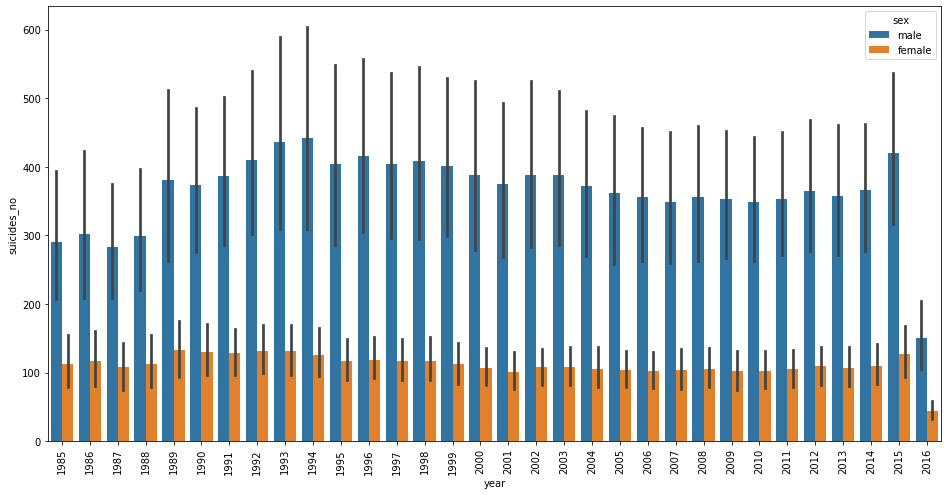

In [10]:
plt.figure(figsize=(16,8))
sns.barplot(data=data,x='year',y='suicides_no',hue='sex')
plt.xticks(rotation=90)
plt.show()
plt.show()

### 1994 have the most suicides_no while 2016(prob due to lack of entries) have the least followed by 1987

In [11]:
data[data['year'] == 2016].shape[0],data[data['year'] == 1990].shape[0]

(160, 768)

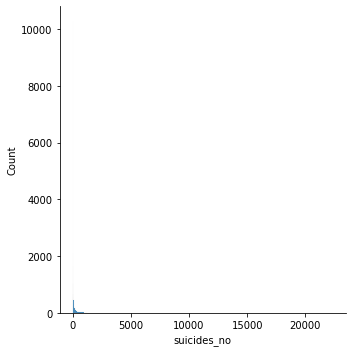

In [12]:
sns.displot(data=data,x='suicides_no')

### lets make the suicide_no more normal

In [13]:
q1 = data['suicides_no'].quantile(.25)
q3 = data['suicides_no'].quantile(.75)
IQR = q3 - q1
IQR = IQR *1.5
min_ = q1 - IQR
max_ = q3 + IQR


data.loc[(data['suicides_no'] < max_) & (data['suicides_no'] > min_)]


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z


In [14]:
data = normalize_feat(data,'suicides_no')

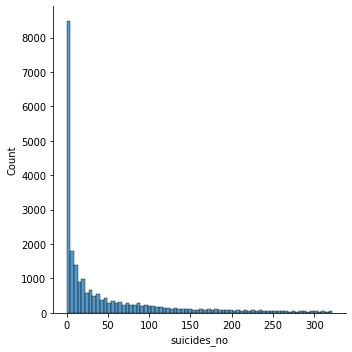

In [15]:
sns.displot(data=data,x='suicides_no')

In [16]:
df_1985 = data[data['year'] == min(data['year'])]

Text(0.5, 1.0, 'dist of 1985')

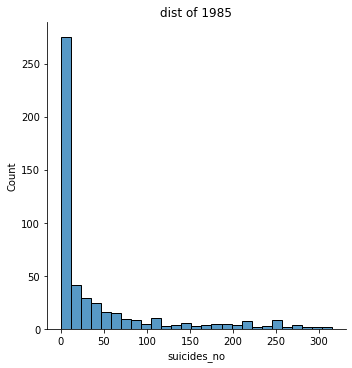

In [17]:
sns.displot(data=df_1985,x='suicides_no')
plt.title('dist of 1985')

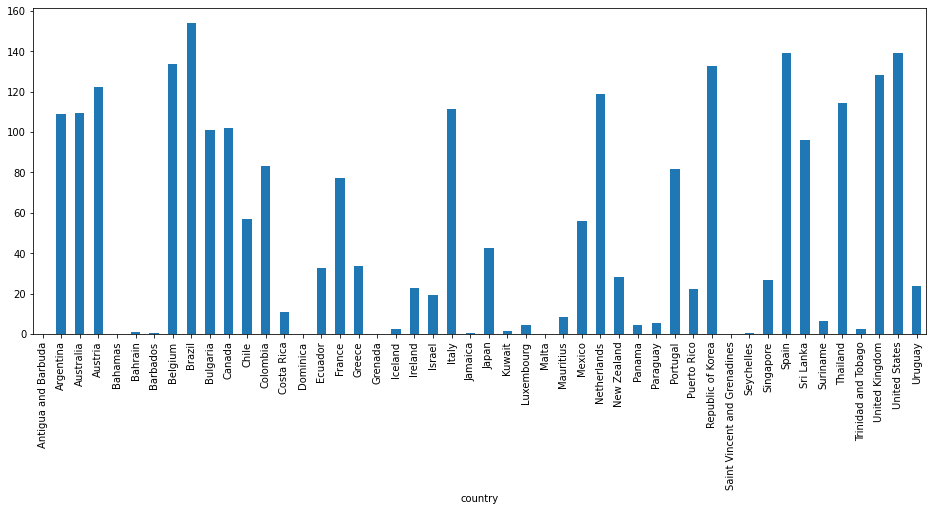

In [18]:
plt.figure(figsize=(16,6))
df_1985.groupby('country')['suicides_no'].mean().plot.bar()
plt.show()

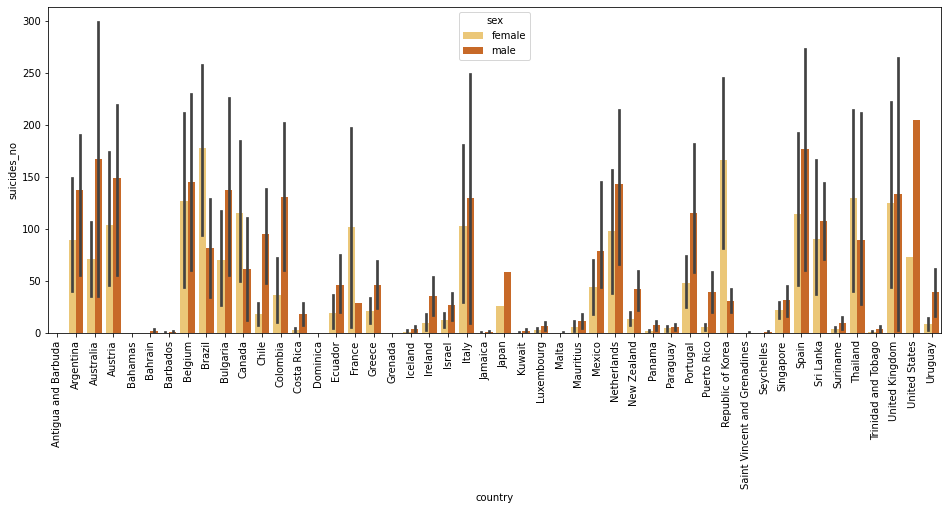

In [19]:
plt.figure(figsize=(16,6))

sns.barplot(data=df_1985,x='country',y='suicides_no',palette='YlOrBr',hue='sex')
plt.xticks(rotation=90)
plt.show()

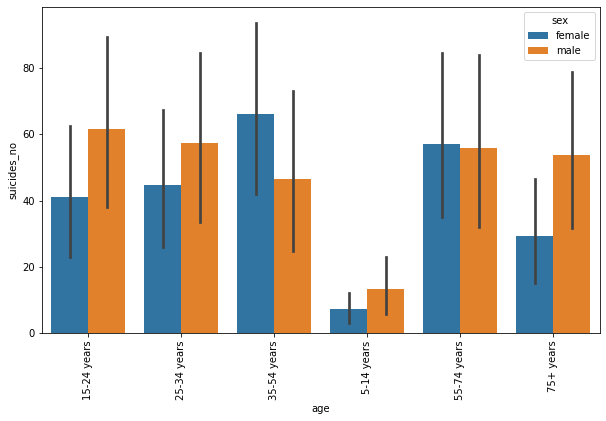

In [20]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_1985,x='age',y='suicides_no',hue='sex')
plt.xticks(rotation=90)
plt.show()

In [21]:
data[data['suicides_no'] == max(data['suicides_no'])]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
1991,Austria,2002,male,55-74 years,322,747406,43.08,Austria2002,"213,377,771,504",27772,Silent
4957,Canada,1988,female,35-54 years,322,3274100,9.83,Canada1988,"507,354,351,182",21069,Silent
4969,Canada,1989,female,35-54 years,322,3384300,9.51,Canada1989,"565,055,743,243",23188,Silent
7301,Czech Republic,2007,male,55-74 years,322,1047512,30.74,Czech Republic2007,"189,227,050,760",19273,Silent
15117,Lithuania,2001,male,55-74 years,322,276422,116.49,Lithuania2001,"12,252,498,921",3719,Silent
17129,Netherlands,1990,male,35-54 years,322,2065400,15.59,Netherlands1990,"314,267,667,675",22425,Silent
20332,Republic of Korea,1993,female,25-34 years,322,4131600,7.79,Republic of Korea1993,"386,302,839,274",9479,Boomers
20725,Romania,1999,male,25-34 years,322,1770400,18.19,Romania1999,"36,183,003,978",1698,Generation X
25044,Thailand,1992,female,25-34 years,322,5061899,6.36,Thailand1992,"111,452,869,378",2120,Boomers
25306,Thailand,2016,male,15-24 years,322,4736305,6.80,Thailand2016,"411,755,164,833",6713,Millenials


In [22]:
df_1994 = data[data['year'] == 1994]
df_1994.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
10486,Grenada,1994,male,15-24 years,0,9469,0.00,Grenada1994,"325,111,815",3735,Generation X
16677,Mexico,1994,female,15-24 years,168,9886600,1.70,Mexico1994,"527,813,238,126",6735,Generation X
18638,Paraguay,1994,male,35-54 years,22,414561,5.31,Paraguay1994,"7,870,982,171",1981,Boomers
14233,Kuwait,1994,male,15-24 years,2,137100,1.46,Kuwait1994,"24,848,483,838",17161,Generation X
701,Argentina,1994,female,55-74 years,135,2597400,5.20,Argentina1994,"257,440,000,000",8328,Silent


Text(0.5, 1.0, 'dist of 1994(most recored suicide in a year)')

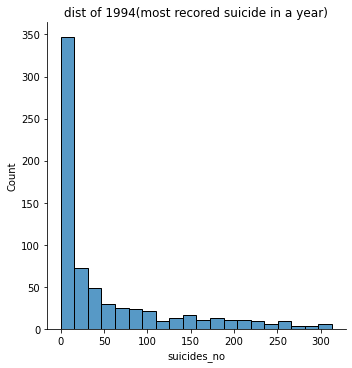

In [23]:
sns.displot(data=df_1994,x='suicides_no')
plt.title('dist of 1994(most recored suicide in a year)')

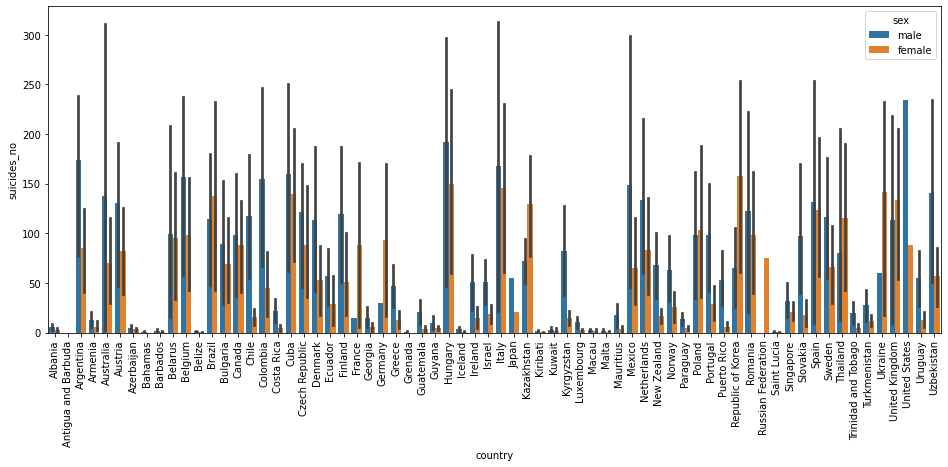

In [24]:
plt.figure(figsize=(16,6))

sns.barplot(data=df_1994,x='country',y='suicides_no',hue='sex')
plt.xticks(rotation=90)
plt.show()

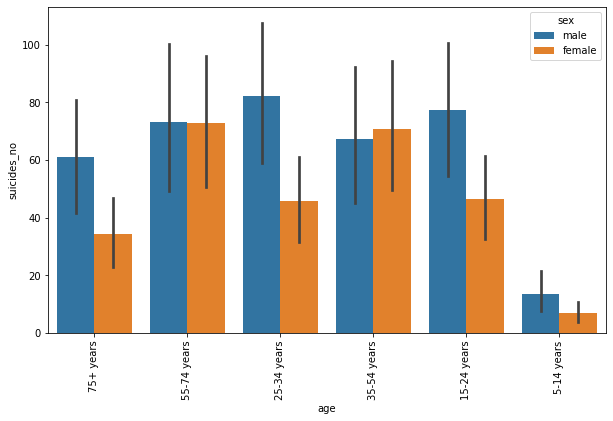

In [25]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_1994,x='age',y='suicides_no',hue='sex')
plt.xticks(rotation=90)
plt.show()

In [26]:
sui_by_pop = data['suicides_no'] / data['population'] 
data['sui_by_pop'] = sui_by_pop

<ipython-input-26-2a2a2a25a8dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sui_by_pop'] = sui_by_pop


In [27]:
data.groupby(['country','year'])['sui_by_pop'].mean()[:10].sort_values(ascending=False)

country  year
Albania  1997    0.000065
         1998    0.000055
         1996    0.000036
         1995    0.000034
         1989    0.000028
         1993    0.000027
         1988    0.000027
         1994    0.000027
         1987    0.000027
         1992    0.000015
Name: sui_by_pop, dtype: float64

In [28]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,sui_by_pop
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,0.000067
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,0.000052
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,0.000048
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,0.000046
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,0.000033


In [29]:
for i in data['generation'].unique():
    df = data[data['generation'] == i]
    print(i,len(df),f'\n\tsucides = {df["suicides_no"].sum()}')

Generation X 5452 
	sucides = 286799
Silent 5353 
	sucides = 306413
G.I. Generation 2414 
	sucides = 116480
Boomers 3816 
	sucides = 261433
Millenials 5399 
	sucides = 167837
Generation Z 1470 
	sucides = 15906


In [30]:
# suicide by generation

<AxesSubplot:xlabel='generation'>

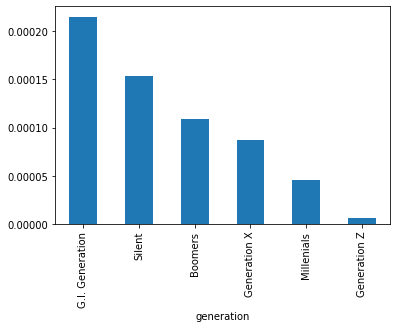

In [31]:
data.groupby(['generation'])['sui_by_pop'].mean().sort_values(ascending=False).plot(kind='bar')

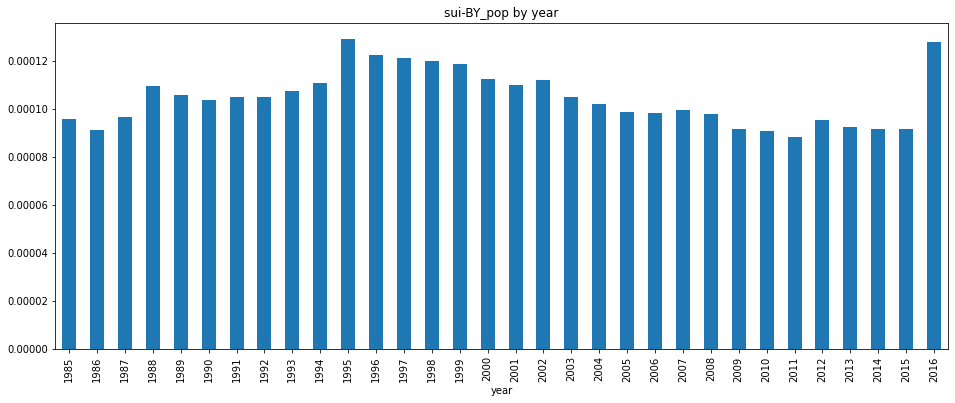

In [32]:
plt.figure(figsize=(16,6))
data.groupby(['year'])['sui_by_pop'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('sui-BY_pop by year')
plt.show()

In [33]:
# data['country'].unique()

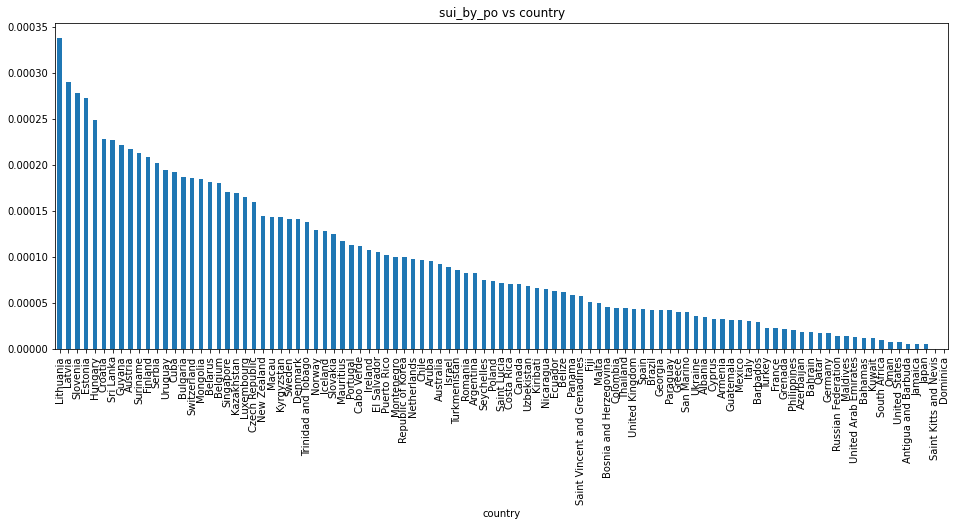

In [34]:
plt.figure(figsize=(16,6))
data.groupby(['country'])['sui_by_pop'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('sui_by_po vs country')
plt.show()

#### Lithuania has the most suicides_no by population

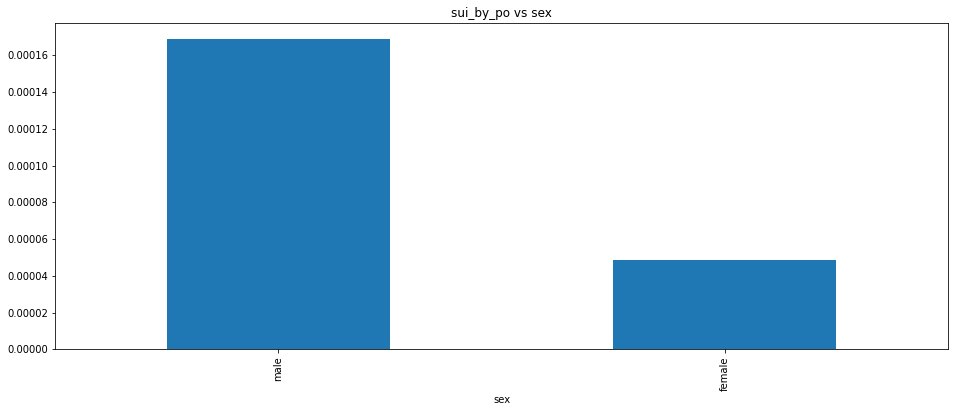

In [35]:
plt.figure(figsize=(16,6))
data.groupby(['sex'])['sui_by_pop'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('sui_by_po vs sex')
plt.show()

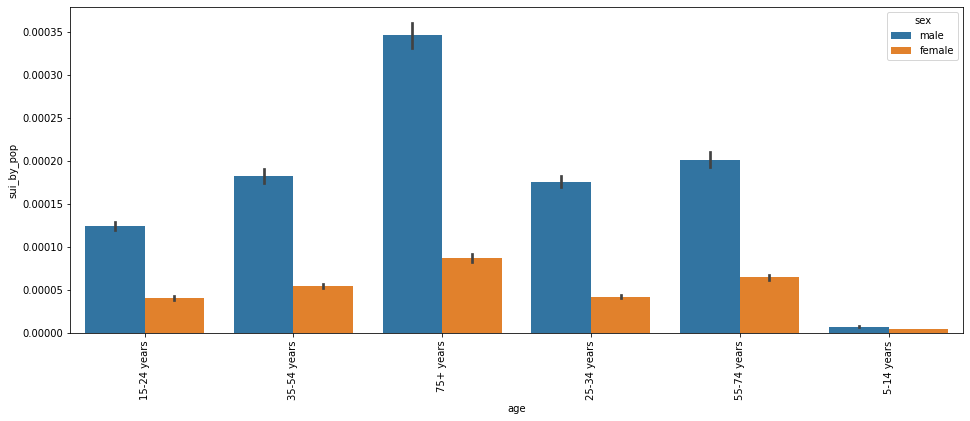

In [36]:
plt.figure(figsize=(16,6))

sns.barplot(data=data,x='age',y='sui_by_pop',hue='sex')
plt.xticks(rotation=90)
plt.show()

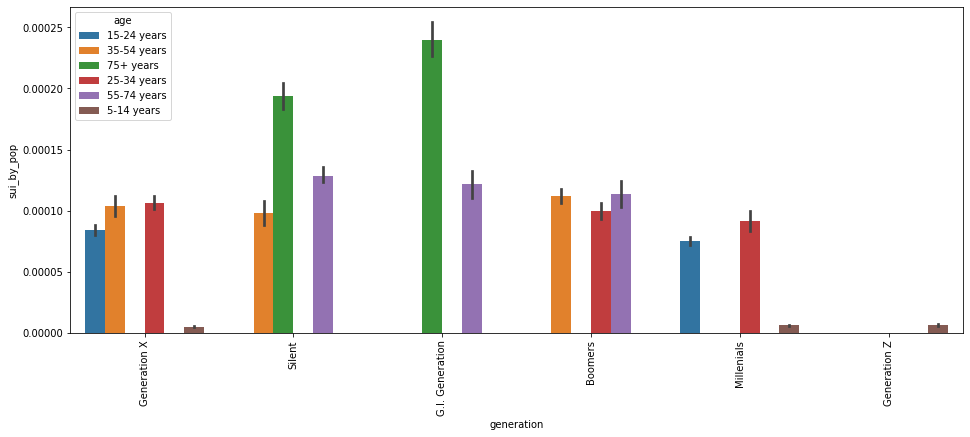

In [37]:
plt.figure(figsize=(16,6))

sns.barplot(data=data,x='generation',y='sui_by_pop',hue='age')
plt.xticks(rotation=90)
plt.show()

In [38]:
data['sui_by_total'] = data['suicides_no']/data['suicides_no'].sum()

<ipython-input-38-2ab9e3f246b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sui_by_total'] = data['suicides_no']/data['suicides_no'].sum()


<AxesSubplot:xlabel='generation'>

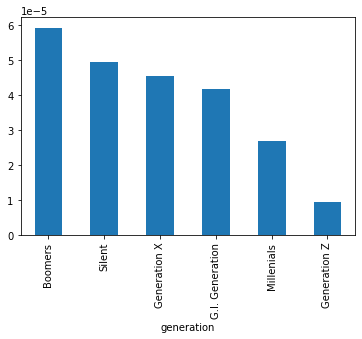

In [39]:
data.groupby(['generation'])['sui_by_total'].mean().sort_values(ascending=False).plot(kind='bar')

In [40]:
data.groupby(['age'])['sui_by_total'].mean().sort_values(ascending=False)

age
35-54 years    0.000061
55-74 years    0.000059
25-34 years    0.000048
15-24 years    0.000045
75+ years      0.000038
5-14 years     0.000009
Name: sui_by_total, dtype: float64

<AxesSubplot:xlabel='age'>

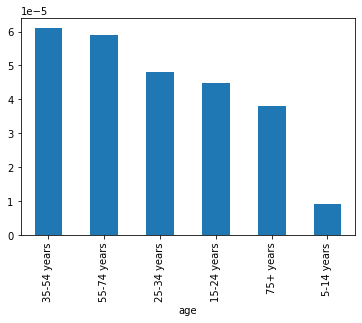

In [41]:
data.groupby(['age'])['sui_by_total'].mean().sort_values(ascending=False).plot(kind='bar')

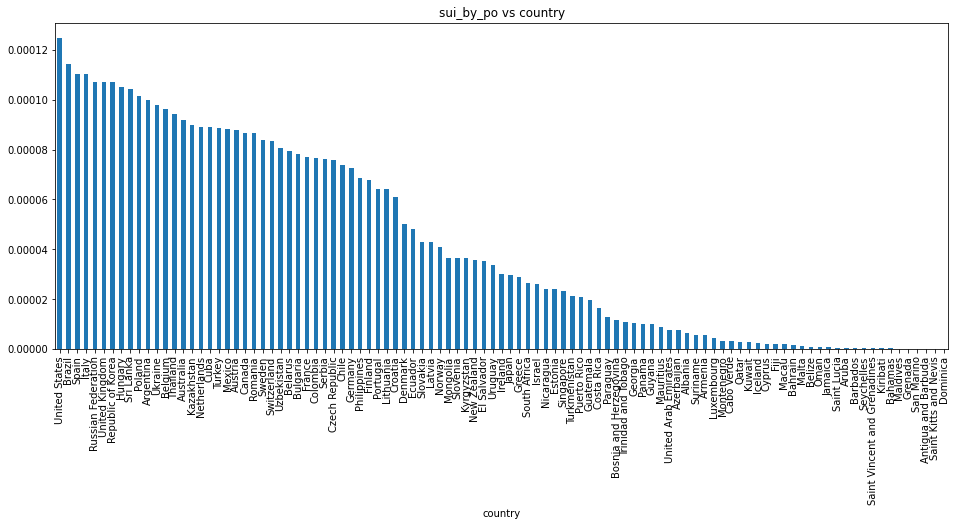

In [42]:
plt.figure(figsize=(16,6))
data.groupby(['country'])['sui_by_total'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('sui_by_po vs country')
plt.show()

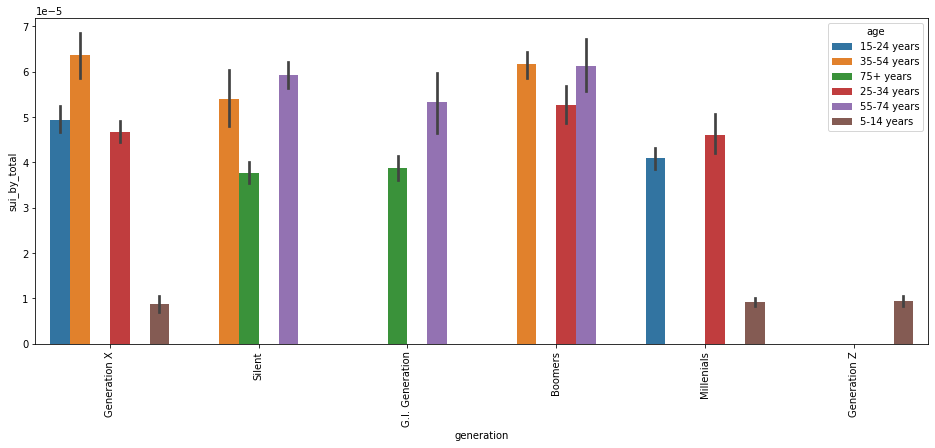

In [43]:
plt.figure(figsize=(16,6))

sns.barplot(data=data,x='generation',y='sui_by_total',hue='age')
plt.xticks(rotation=90)
plt.show()

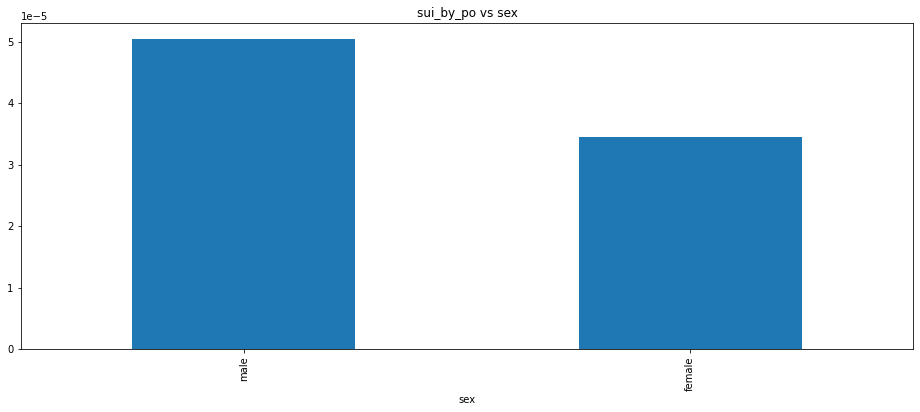

In [44]:
plt.figure(figsize=(16,6))
data.groupby(['sex'])['sui_by_total'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('sui_by_po vs sex')
plt.show()

# deeper into features

In [45]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation', 'sui_by_pop', 'sui_by_total'],
      dtype='object')

# gdp_for_year

In [46]:
mult=2

In [47]:
f = 'gdp_for_year'
temp = data.copy()
temp['gdp_for_year'] = temp[' gdp_for_year ($) '].apply(lambda x: int(x.replace(',','')))
temp.drop( ' gdp_for_year ($) ',1,inplace=True)


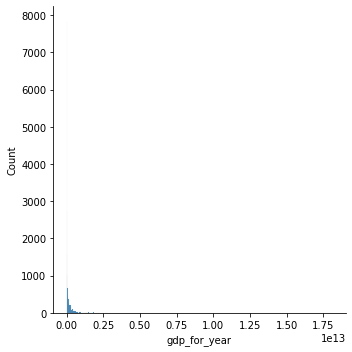

In [48]:
sns.displot(data=temp,x=f)

In [49]:
mult = 2

In [50]:
temp1 = normalize_feat(temp,f,mult)
research_feature(temp,f,mult)

df size 23904
temp size 21703
differences: 2201
diff % 0.09207663989290495


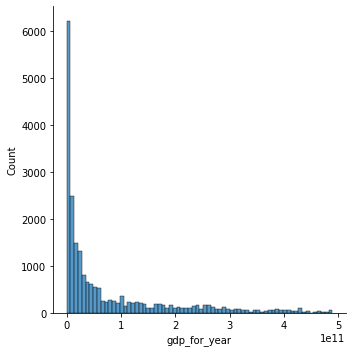

In [51]:
sns.displot(data=temp1,x=f)

<AxesSubplot:>

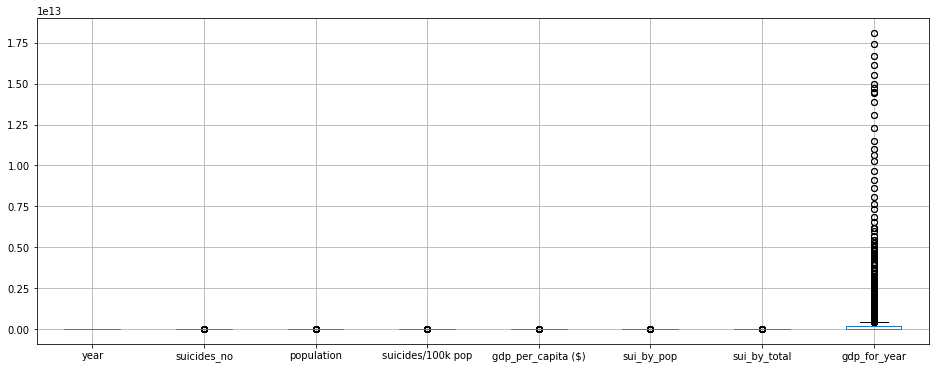

In [52]:
plt.figure(figsize=(16,6))
temp.boxplot()

<AxesSubplot:>

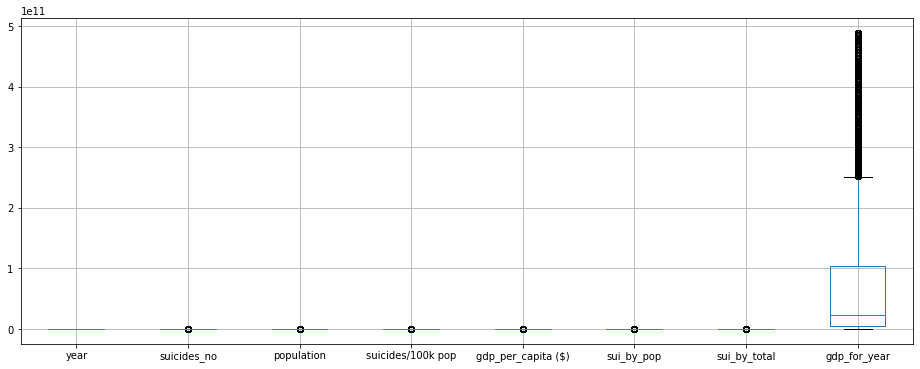

In [53]:
plt.figure(figsize=(16,6))
temp1.boxplot()

In [54]:
df = temp1.copy()
del temp

# population

In [55]:
mult = 2.5

In [56]:
df.population

0         312900
1         308000
2         289700
3          21800
4         274300
          ...   
27815    3620833
27816     348465
27817    2762158
27818    2631600
27819    1438935
Name: population, Length: 21703, dtype: int64

In [57]:
df.shape[0] 

21703

In [58]:
normalize_feat(df,'population',mult).shape[0]

20201

In [59]:
# def research_feature(data,feature,mult=1.5):
#     temp = normalize_feat(data,feature,mult)
#     diff = data.shape[0] - temp.shape[0]
#     print(f'df size {data.shape[0]}')
#     print(f'temp size {temp.shape[0]}')

#     print('differences:',diff)
#     print('diff %',diff/data.shape[0])

In [60]:
research_feature(df,'population')

df size 21703
temp size 19717
differences: 1986
diff % 0.09150808643966273


In [61]:
temp = normalize_feat(df,'population',mult)
diff = df.shape[0] - temp.shape[0]
print(f'df size {df.shape[0]}')
print(f'temp size {temp.shape[0]}')

print('differences:',diff)
print('diff %',diff/df.shape[0])
del diff

df size 21703
temp size 20201
differences: 1502
diff % 0.06920702207068147


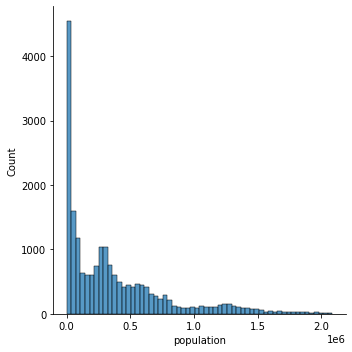

In [62]:
sns.displot(x='population',data=temp)

In [63]:
temp = normalize_feat(df,'population',mult)

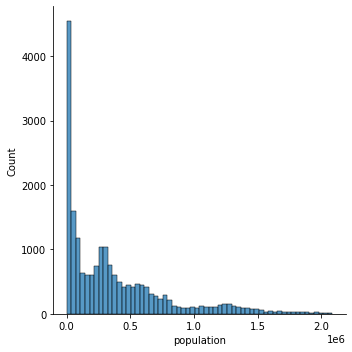

In [64]:
sns.displot(data=temp,x='population')

<AxesSubplot:>

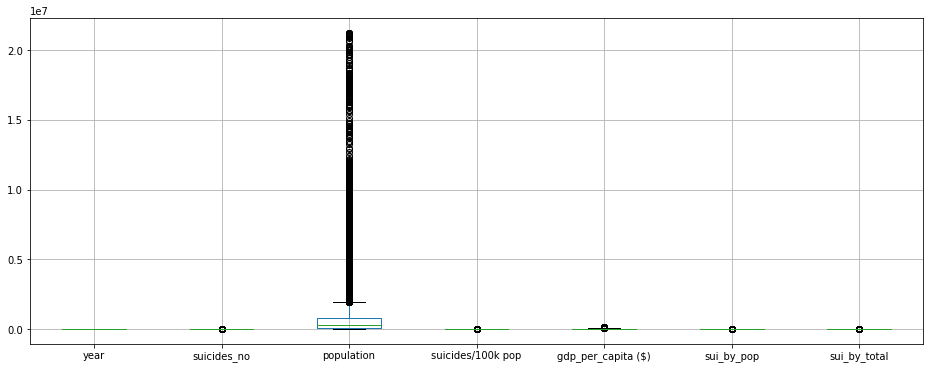

In [65]:
plt.figure(figsize=(16,6))

data.boxplot()

<AxesSubplot:>

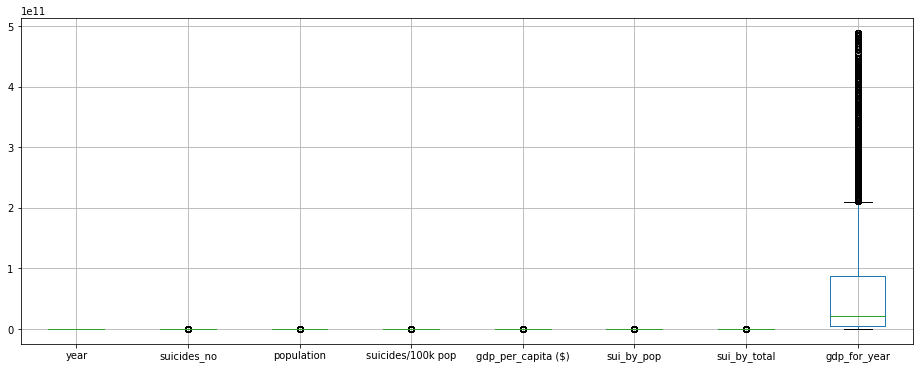

In [66]:
plt.figure(figsize=(16,6))
temp.boxplot()

In [68]:
#stop

In [93]:
df2 = df.copy()

In [94]:
df2.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X,0.000067,0.000018,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent,0.000052,0.000014,2156624900


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21703 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             21703 non-null  object 
 1   year                21703 non-null  int64  
 2   sex                 21703 non-null  object 
 3   age                 21703 non-null  object 
 4   suicides_no         21703 non-null  int64  
 5   population          21703 non-null  int64  
 6   suicides/100k pop   21703 non-null  float64
 7   country-year        21703 non-null  object 
 8   gdp_per_capita ($)  21703 non-null  int64  
 9   generation          21703 non-null  object 
 10  sui_by_pop          21703 non-null  float64
 11  sui_by_total        21703 non-null  float64
 12  gdp_for_year        21703 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 2.3+ MB


In [96]:
# df['gdp_for_year'] = df[' gdp_for_year ($) '].apply(lambda x: int(x.replace(',','')))
# df.drop(' gdp_for_year ($) ',1,inplace=True)

In [97]:
df2.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,796,Generation X,0.000067,0.000018,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,796,Silent,0.000052,0.000014,2156624900


In [98]:
df2.corr()['gdp_per_capita ($)'].sort_values(ascending=False)

gdp_per_capita ($)    1.000000
gdp_for_year          0.474525
year                  0.303942
suicides/100k pop     0.034038
sui_by_pop            0.034036
sui_by_total         -0.022980
suicides_no          -0.022980
population           -0.148180
Name: gdp_per_capita ($), dtype: float64

In [99]:
df2.corr()['suicides/100k pop'].sort_values(ascending=False)

suicides/100k pop     1.000000
sui_by_pop            1.000000
sui_by_total          0.434660
suicides_no           0.434660
gdp_per_capita ($)    0.034038
gdp_for_year          0.011617
year                 -0.025520
population           -0.129236
Name: suicides/100k pop, dtype: float64

In [100]:
df2.drop('country-year',1,inplace=True)

In [101]:
df2.drop('suicides/100k pop',1,inplace=True)

In [102]:
df2.head(2)

,country,year,sex,age,suicides_no,population,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,796,Generation X,0.000067,0.000018,2156624900
1,Albania,1987,male,35-54 years,16,308000,796,Silent,0.000052,0.000014,2156624900


In [103]:
num = [x for x in df.columns if df[x].dtype != 'O']
num

['year',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'gdp_per_capita ($)',
 'sui_by_pop',
 'sui_by_total',
 'gdp_for_year']

In [104]:
# for i in num:
#     sns.boxplot(y=df2[i])
#     plt.title(i)
#     plt.show()

In [105]:
# for i in num:
#     plt.figure(figsize=(16,6))
#     sns.boxplot(data=df,x=i,y='suicides_no')
#     plt.title(i)
#     plt.show()

In [106]:
df2.shape

(21703, 11)

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21703 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             21703 non-null  object 
 1   year                21703 non-null  int64  
 2   sex                 21703 non-null  object 
 3   age                 21703 non-null  object 
 4   suicides_no         21703 non-null  int64  
 5   population          21703 non-null  int64  
 6   gdp_per_capita ($)  21703 non-null  int64  
 7   generation          21703 non-null  object 
 8   sui_by_pop          21703 non-null  float64
 9   sui_by_total        21703 non-null  float64
 10  gdp_for_year        21703 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.0+ MB


In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
le = LabelEncoder()

In [112]:
cag = [x for x in df2.columns if df2[x].dtype=='O']
for i in cag:
    if i == 'sex':
        df2['is_male'] = le.fit_transform(df2[i])
        df2.drop('sex',1,inplace=True)
    else:
        df2[i] = le.fit_transform(df2[i])

In [113]:
df2

,country,year,age,suicides_no,population,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year,is_male
0,0,1987,0,21,312900,796,2,0.000067,1.818390e-05,2156624900,1
1,0,1987,2,16,308000,796,5,0.000052,1.385440e-05,2156624900,1
2,0,1987,0,14,289700,796,2,0.000048,1.212260e-05,2156624900,0
3,0,1987,5,1,21800,796,1,0.000046,8.658998e-07,2156624900,1
4,0,1987,1,9,274300,796,0,0.000033,7.793098e-06,2156624900,1
...,...,...,...,...,...,...,...,...,...,...,...
27815,95,2014,2,107,3620833,2309,2,0.000030,9.265128e-05,63067077179,0
27816,95,2014,5,9,348465,2309,5,0.000026,7.793098e-06,63067077179,0
27817,95,2014,3,60,2762158,2309,3,0.000022,5.195399e-05,63067077179,1
27818,95,2014,3,44,2631600,2309,3,0.000017,3.809959e-05,63067077179,0


In [115]:
df2.to_csv('data/data.csv',index=False)